In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [27]:
# Load the data
train_data = pd.read_csv('datasets/train.csv')  # Replace with the actual path to your dataset

# Separate features and target variables
X = train_data.drop(columns=['A', 'B', 'C', 'D', 'E', 'Y'])  # Features (independent variables)
y = train_data[['A', 'B', 'C', 'D', 'E', 'Y']]  # Targets (dependent variables)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Preprocessing - Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [29]:
# Convert data to PyTorch tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_train_tensor = {target: torch.tensor(y_train[target].values, dtype=torch.float32).to(device) for target in ['A', 'B', 'C', 'D', 'E', 'Y']}
y_val_tensor = {target: torch.tensor(y_val[target].values, dtype=torch.float32).to(device) for target in ['A', 'B', 'C', 'D', 'E', 'Y']}

In [30]:
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [31]:
# Train model for each target variable
models = {}
predictions = {}

Training model for A...
MAPE for A: 0.22%


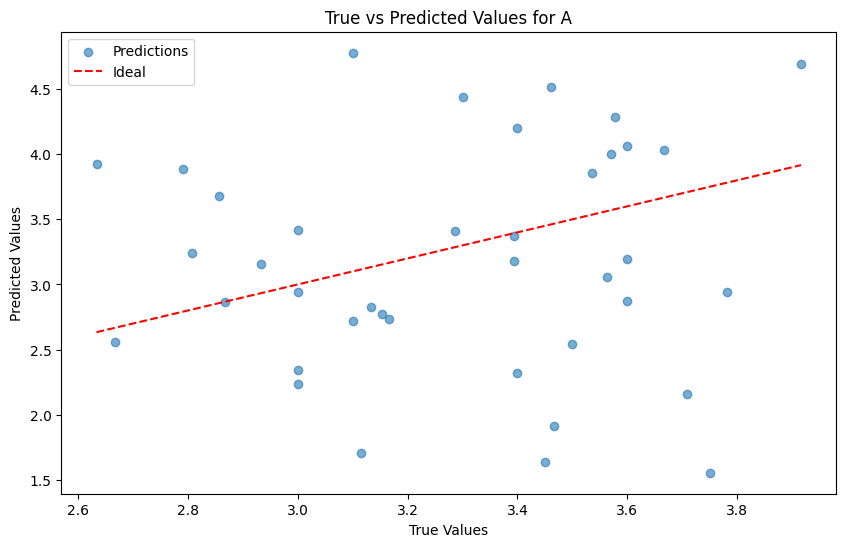

Training model for B...
MAPE for B: 0.22%


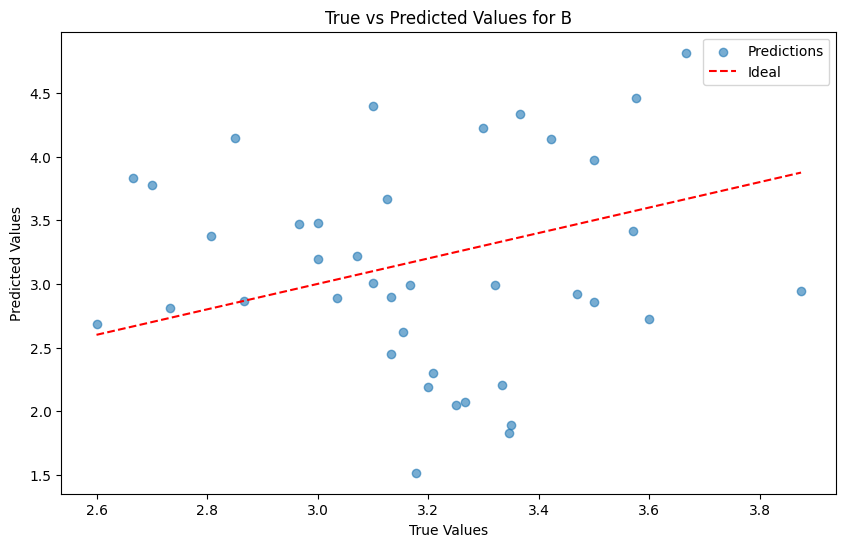

Training model for C...
MAPE for C: 0.24%


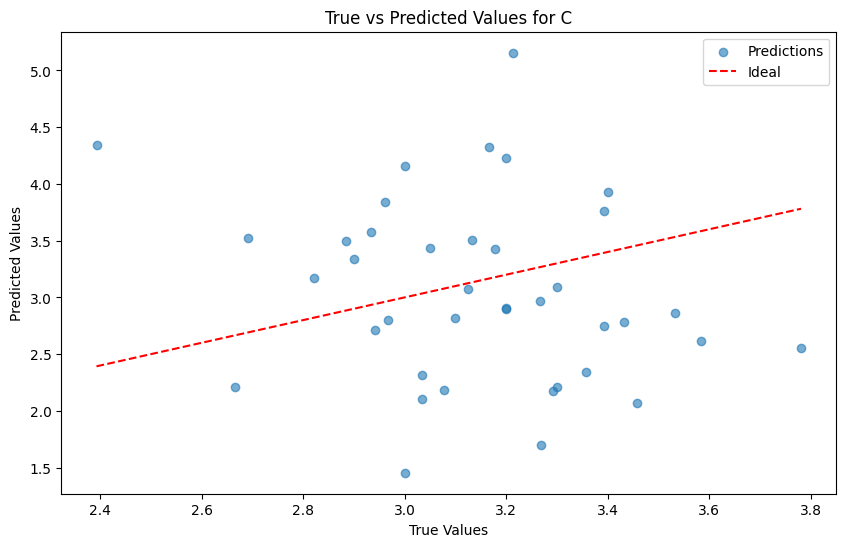

Training model for D...
MAPE for D: 0.21%


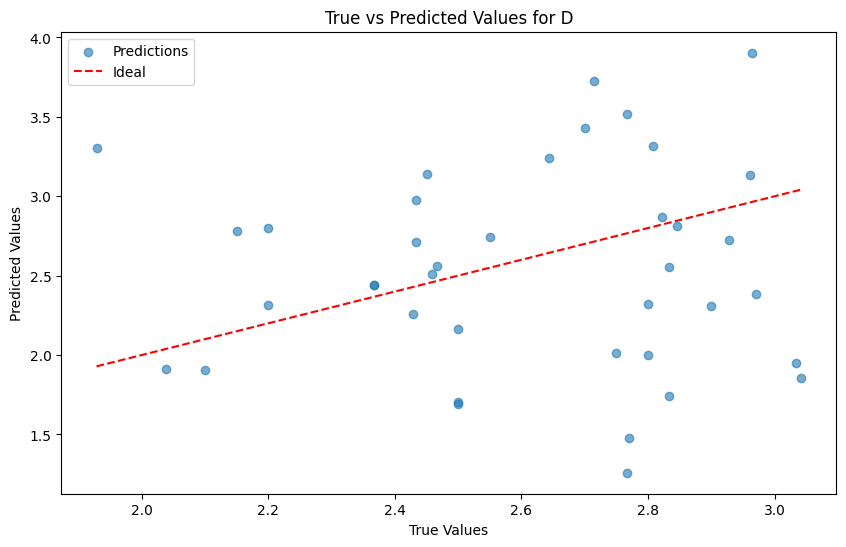

Training model for E...
MAPE for E: 0.22%


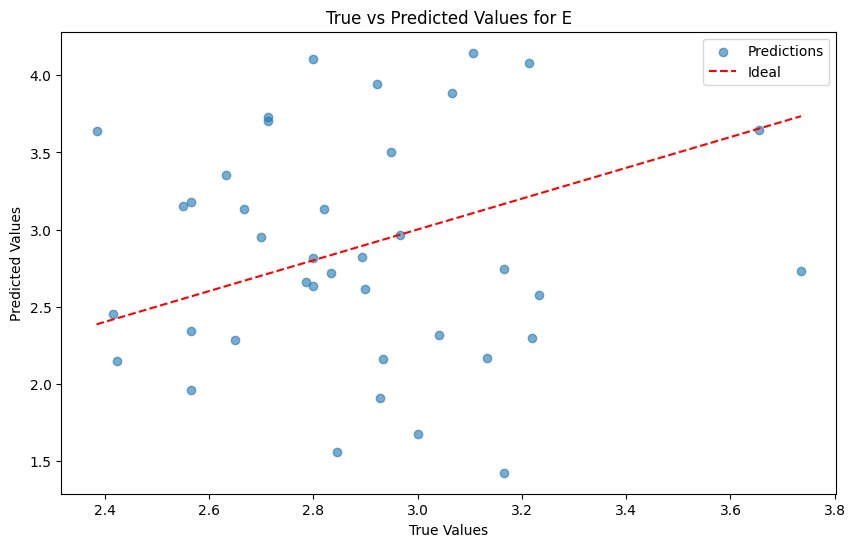

Training model for Y...
MAPE for Y: 0.42%


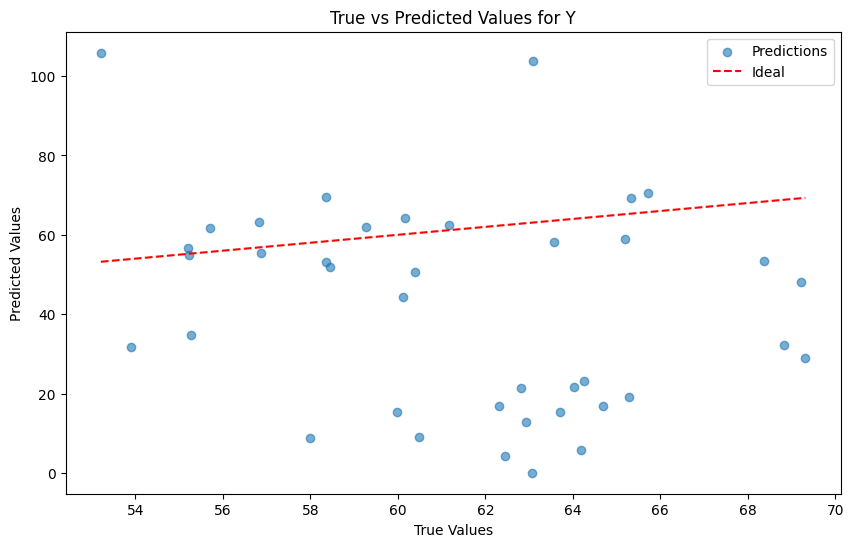

In [32]:
for target in ['A', 'B', 'C', 'D', 'E', 'Y']:
    print(f"Training model for {target}...")
    
    model = SimpleNN(X_train_tensor.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(100):  # Number of epochs
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor[target])
        loss.backward()
        optimizer.step()
    
    models[target] = model
    
    # Predicting on the validation set
    model.eval()
    with torch.no_grad():
        pred = model(X_val_tensor).squeeze().cpu().numpy()
    predictions[target] = pred
    
    # Calculate and print MAPE for each target variable
    mape = mean_absolute_percentage_error(y_val[target].values, pred)  # Convert y_val[target] to NumPy array
    print(f"MAPE for {target}: {mape:.2f}%")
    
    # Plot True vs Predicted for each target
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val[target].values, pred, alpha=0.6, label='Predictions')  # Convert y_val[target] to NumPy array
    plt.plot([y_val[target].min(), y_val[target].max()], [y_val[target].min(), y_val[target].max()], 'r--', label='Ideal')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'True vs Predicted Values for {target}')
    plt.legend()
    plt.show()

In [33]:
# Output the predictions
prediction_df = pd.DataFrame(predictions)
print(prediction_df)

           A         B         C         D         E           Y
0   3.179690  2.991153  2.910097  2.557306  2.817162   12.894813
1   4.780070  4.400549  3.758012  3.725436  4.147031    4.250728
2   3.194035  2.893372  2.714255  2.386947  2.730969   70.493401
3   4.030231  3.668911  3.494959  3.134148  3.646320   69.243820
4   1.914502  2.071584  2.103399  1.689002  1.959618    9.197669
5   2.870103  2.720539  2.557470  2.014907  2.299156   28.999203
6   2.715393  2.810923  2.798033  2.313442  2.342992   34.726501
7   3.372838  3.220907  3.173885  2.866420  3.132693   15.465121
8   2.942148  2.923690  2.859910  2.308665  2.746202   53.358505
9   3.682689  3.475347  3.337416  2.783859  3.153821   56.711685
10  1.553596  1.516225  1.455332  1.258934  1.422052   21.666819
11  3.928272  3.775098  3.579042  2.978953  3.356503   31.811186
12  2.161837  2.051138  2.339056  1.707175  1.904832   23.276461
13  4.000164  3.972054  3.930843  3.139372  3.501446   58.975361
14  4.441519  4.335592  4